In [1]:
#Loading Libraries
import math
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#Uploading dataset
df = pd.read_csv('BrentOilPrices.csv', sep = ",")
df.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [3]:
print(df)

              Date  Price
0     May 20, 1987  18.63
1     May 21, 1987  18.45
2     May 22, 1987  18.55
3     May 25, 1987  18.60
4     May 26, 1987  18.63
...            ...    ...
8211  Sep 24, 2019  64.13
8212  Sep 25, 2019  62.41
8213  Sep 26, 2019  62.08
8214  Sep 27, 2019  62.48
8215  Sep 30, 2019  60.99

[8216 rows x 2 columns]


In [4]:
# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
# Convert Date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
#Deleting unrequired data and only keeping data from the last 20 years
df['date'] = pd.to_datetime(df['date'])

df = df[~(df['date'] < '1999-10-05')]

print(df)

           date  price
3140 1999-10-05  22.64
3141 1999-10-06  23.07
3142 1999-10-07  22.33
3143 1999-10-08  20.78
3144 1999-10-11  20.84
...         ...    ...
8211 2019-09-24  64.13
8212 2019-09-25  62.41
8213 2019-09-26  62.08
8214 2019-09-27  62.48
8215 2019-09-30  60.99

[5076 rows x 2 columns]


Text(0, 0.5, 'Price')

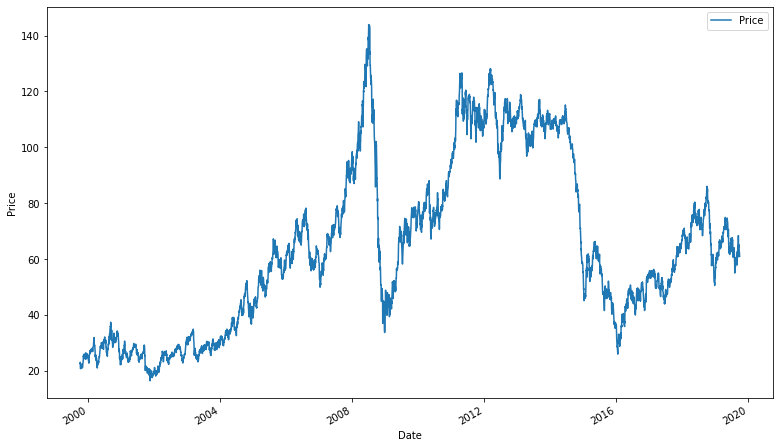

In [6]:
#Line chart for the last 20 years
rcParams['figure.figsize'] = 13, 8 #width 13, height 8
ax = df.plot(x='date', y='price')
ax.legend(['Price'])
ax.set_xlabel("Date")
ax.set_ylabel("Price")

In [7]:
#Displaying dataset
df

,date,price
3140,1999-10-05,22.64
3141,1999-10-06,23.07
3142,1999-10-07,22.33
3143,1999-10-08,20.78
3144,1999-10-11,20.84
...,...,...
8211,2019-09-24,64.13
8212,2019-09-25,62.41
8213,2019-09-26,62.08
8214,2019-09-27,62.48


In [8]:
#Creating Moving averages
df['MA_3']=df.price.rolling(3).mean()
df['MA_9']=df.price.rolling(9).mean()

Text(0.5, 0, 'date')

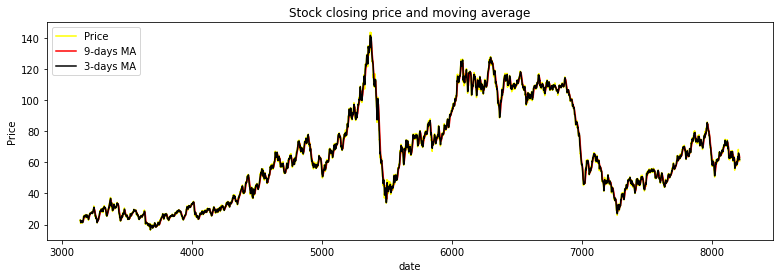

In [9]:
#Plotting moving averages on price chart
fig, ax = plt.subplots(figsize=(13,4))

ax.plot(df['price'], label='Price',color='yellow')

ax.plot(df['MA_9'], label='9-days MA',color='red')
ax.plot(df['MA_3'], label='3-days MA',color='black')
plt.title('Stock closing price and moving average')

ax.legend(loc='upper left')
ax.set_ylabel('Price')
ax.set_xlabel("date")

In [10]:
#Updated dataset with moving averages
df

,date,price,MA_3,MA_9
3140,1999-10-05,22.64,NaN,NaN
3141,1999-10-06,23.07,NaN,NaN
3142,1999-10-07,22.33,22.680000,NaN
3143,1999-10-08,20.78,22.060000,NaN
3144,1999-10-11,20.84,21.316667,NaN
...,...,...,...,...
8211,2019-09-24,64.13,64.673333,64.286667
8212,2019-09-25,62.41,63.733333,64.470000
8213,2019-09-26,62.08,62.873333,64.562222
8214,2019-09-27,62.48,62.323333,63.902222


In [11]:
#Dropping Null values
df = pd.DataFrame(df).dropna()
df

,date,price,MA_3,MA_9
3148,1999-10-15,21.65,22.063333,21.971111
3149,1999-10-18,22.26,22.063333,21.928889
3150,1999-10-19,21.59,21.833333,21.764444
3151,1999-10-20,21.02,21.623333,21.618889
3152,1999-10-21,21.68,21.430000,21.718889
...,...,...,...,...
8211,2019-09-24,64.13,64.673333,64.286667
8212,2019-09-25,62.41,63.733333,64.470000
8213,2019-09-26,62.08,62.873333,64.562222
8214,2019-09-27,62.48,62.323333,63.902222


In [12]:
X = df[['MA_3','MA_9']].values
y = df['price'].values

In [13]:
#Splitting dataset in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)


In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)


In [17]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 0.042238025044120775
Coefficients: 
 [ 1.22442904 -0.2250679 ]


In [18]:
#Prediction of test set
y_pred_model= model.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_model))

Prediction for test set: [ 32.58391378 111.79768854  22.08265364 ...  46.64375543  27.34655323
  40.81082805]


In [19]:
y_pred

array([ 32.58391378, 111.79768854,  22.08265364, ...,  46.64375543,
        27.34655323,  40.81082805])

In [20]:
y_test

array([ 32.35, 112.04,  22.58, ...,  46.09,  27.31,  40.72])

In [21]:
#Create a new data frame
arr2 = np.array([y_test, y_pred])

In [22]:
arr2

array([[ 32.35      , 112.04      ,  22.58      , ...,  46.09      ,
         27.31      ,  40.72      ],
       [ 32.58391378, 111.79768854,  22.08265364, ...,  46.64375543,
         27.34655323,  40.81082805]])

In [23]:
df2 = pd.DataFrame(arr2)

In [24]:
df2

,0,1,2,3,4,5,6,7,8,9,...,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266
0,32.350000,112.040000,22.580000,109.070000,24.730000,28.450000,48.16000,68.560000,52.250000,105.710000,...,47.480000,111.32000,44.840000,113.900000,54.200000,39.520000,57.290000,46.090000,27.310000,40.720000
1,32.583914,111.797689,22.082654,108.972598,24.014864,28.947806,48.69608,68.971743,51.653517,105.948247,...,47.511689,111.70559,44.497624,114.220304,54.494935,40.309203,57.388555,46.643755,27.346553,40.810828


In [25]:
my_pd=pd.DataFrame(data=df2).T 
my_pd.columns=['y_test','y_pred']
print(my_pd)

      y_test      y_pred
0      32.35   32.583914
1     112.04  111.797689
2      22.58   22.082654
3     109.07  108.972598
4      24.73   24.014864
...      ...         ...
1262   39.52   40.309203
1263   57.29   57.388555
1264   46.09   46.643755
1265   27.31   27.346553
1266   40.72   40.810828

[1267 rows x 2 columns]


In [26]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_model)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_model)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model))
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.91
Mean Absolute Error: 0.656059707184277
Mean Square Error: 0.8572712769351613
Root Mean Square Error: 0.9258894517895542


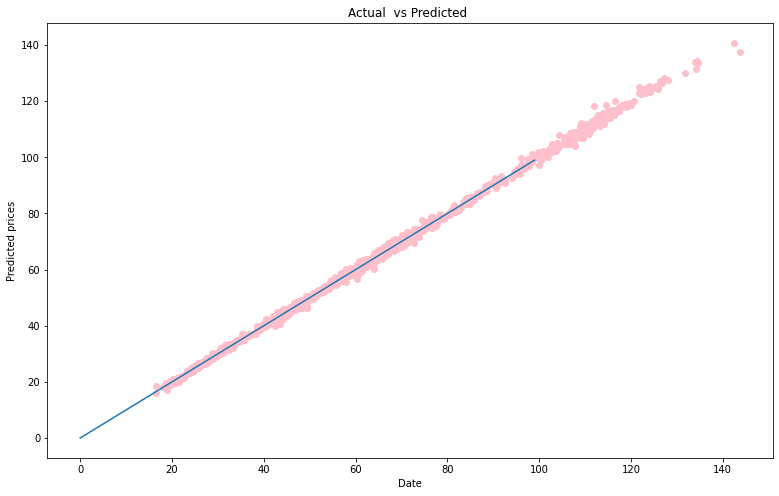

In [27]:
#Plotting predicted value vs actual value of the dependent value using scatterplot
plt.scatter(my_pd['y_test'], my_pd['y_pred'], color='pink')
plt.plot(range(100), range(100))

plt.xlabel("Date")
plt.ylabel("Predicted prices")
plt.title("Actual  vs Predicted ")

plt.show()